In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터 셋 불러오기
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Input,Reshape, Flatten, Reshape
from tensorflow.keras.layers import Embedding , LSTM, BatchNormalization, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers, initializers, regularizers,metrics

In [2]:
b_size = 5
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip = True,
                                  #수평 대칭 이미지를 50% 확률로 만듦
                                  width_shift_range=0.1,
                                  #전체 크기의 10% 범위에서 좌우로 이동
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

In [3]:
b_size = 5
test_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip = True,
                                  #수평 대칭 이미지를 50% 확률로 만듦
                                  width_shift_range=0.1,
                                  #전체 크기의 10% 범위에서 좌우로 이동
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

In [4]:
train_generator = train_datagen.flow_from_directory(
                            'train',
                            target_size=(150,150),
                            batch_size=b_size,
                            class_mode='binary')
# 바이너리를 두개의 모드로 변환한다
# 타겟 사이즈는 그대로.
# 배치 사이즈도 위와 동일

Found 160 images belonging to 2 classes.


In [5]:
# 폴더명을 레이블로 씀
test = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                            'test',
                            target_size=(150,150),
                            batch_size=b_size,
                            class_mode='binary')

Found 120 images belonging to 2 classes.


In [7]:
print(len(train_generator))

32


In [8]:
print(len(test_generator))

24


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [10]:
model.compile(loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy : 이전과는 다르게 정수로 계산, 0.0123~ 이런식이면 0으로 반환
optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [11]:
steps_train = len(train_generator)
steps_test = len(test_generator)

In [12]:
history = model.fit(
       train_generator,
       steps_per_epoch=steps_train, # 수치가 맞지 않으면 삐그덕 거리기 때문에 이런 식으로 맞춰준 것이다.
       epochs=20,
       validation_data=test_generator,
       validation_steps=steps_test )

Epoch 1/20
32/32 [==============================] - 4s 117ms/step - loss: 0.7444 - accuracy: 0.5000 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 3s 93ms/step - loss: 0.6970 - accuracy: 0.5000 - val_loss: 0.6904 - val_accuracy: 0.5083
Epoch 3/20
32/32 [==============================] - 3s 92ms/step - loss: 0.6901 - accuracy: 0.5312 - val_loss: 0.6852 - val_accuracy: 0.5833
Epoch 4/20
32/32 [==============================] - 3s 93ms/step - loss: 0.6758 - accuracy: 0.6375 - val_loss: 0.6783 - val_accuracy: 0.6000
Epoch 5/20
32/32 [==============================] - 3s 97ms/step - loss: 0.6744 - accuracy: 0.5750 - val_loss: 0.6551 - val_accuracy: 0.6500
Epoch 6/20
32/32 [==============================] - 3s 98ms/step - loss: 0.6792 - accuracy: 0.5875 - val_loss: 0.6583 - val_accuracy: 0.7000
Epoch 7/20
32/32 [==============================] - 3s 103ms/step - loss: 0.6397 - accuracy: 0.7063 - val_loss: 0.6058 - val_accuracy: 0.8250
Epoch 8/20


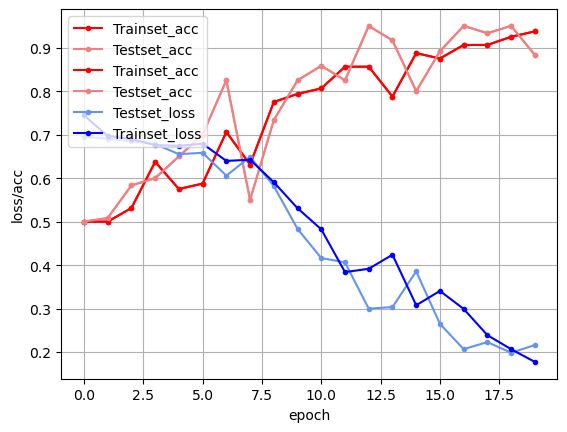

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len,val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
 
plt.legend(loc='upper left') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()